In [ ]:
""" 

SVM => model ML multifungsi yang dapat digunakan untuk menyelesaikan permasalahan klasifikasi, regresi, dan pendeteksian outlier. Kategori supervised 

Hyperplane     => adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas 
support vector => Dalam SVM objek data terluar yang paling dekat dengan hyperplane disebut 
max (margin)   => pembatas kedua kelas pada supervektor

- Tujuan dari algoritma SVM adalah untuk menemukan hyperplane terbaik dalam ruang berdimensi-N ]
  (ruang dengan N-jumlah fitur) yang berfungsi sebagai pemisah yang jelas bagi titik-titik data input.

  => Gambar di sebelah kiri (di materi folder gambarnya) menunjukkan beberapa kemungkinan bidang (hyperplane) untuk memisahkan data lingkaran dan data kotak. Algoritma SVM kemudian mencari hyperplane terbaik yang dapat memisahkan kedua kelas secara optimal. 

keunggulan SVM :
1. SVM efektif pada data berdimensi tinggi kayak t-SNE
2. SVM efektif pada kasus di mana jumlah fitur pada data lebih besar dari jumlah sampel.

bagaimana cara clasifikasi jika datanya tidak linier atau beracakan ?

kernek trick => membuat demensi baru, sehingga dapat membuat batas.
Bagaimana trik kernel bekerja? 

1. menghitung skor jarak dari dua titik data, misal x_i dan x_j. Skor akan bernilai lebih tinggi untuk titik data yang lebih dekat, dan sebaliknya.
2. gunakan skor ini untuk memetakan data pada dimensi yang lebih tinggi (3D).

SVM untuk Klasifikasi Multi-kelas
“one-vs-rest” => memishakan dengan satu persatu tiap kelas
"""

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head(5) # outcome => target label 1 = diabetes, 0 => tidak terkena diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
x = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [ ]:
#kita perlu melakukan standarisasi value untuk nilai yang besar dan kecil seperti glukosa dan diabeter pedigreefunction.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
model = StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x = model.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
# lanjut memisahkan data training dan data testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [ ]:
# Kita kemudian membuat objek Support Vector Classifier dan menampungnya pada variabel

In [ ]:
from sklearn.svm import SVC 

In [ ]:
svc_model = SVC(C=5.0, kernel='linear')

In [ ]:
svc_model.fit(x_train, y_train)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# melihat bagaimana akurasi prediksi dari model yang kita latih terhadap data testing.

In [ ]:
svc_model.score(x_test, y_test)

0.7597402597402597

In [ ]:
""" Support Vector Regression """" 


"""
-> untuk kasus prediksi linear

Support Vector Regression (SVR) menggunakan prinsip yang sama dengan SVM pada kasus klasifikasi. 
Perbedaannya adalah jika pada kasus klasifikasi, SVM berusaha mencari ‘jalan’ terbesar yang bisa memisahkan sampel-sampel dari kelas berbeda, 
maka pada kasus regresi SVR berusaha mencari jalan yang dapat menampung sebanyak mungkin sampel di ‘jalan’.


-> Ada dua parameter yang kita gunakan dalam model SVR, yaitu parameter ϵ yang menunjukkan margin of error dan parameter C 
   yang merupakan parameter keteraturan atau regularization parameter.

->  pada SVR support vector adalah sampel yang menjadi pembatas jalan yang dapat menampung seluruh sampel pada data

->  salah satu kelebihan SVR dibanding regresi linear adalah SVR memberi kita fleksibilitas untuk menentukan seberapa banyak kesalahan yang dapat diterima dalam model kita. 
    Algoritma SVR akan menemukan garis yang cocok (hyperplane) agar sesuai dengan data. Kita bisa mengatur parameter ϵ untuk mendapatkan akurasi model yang kita inginkan

Algoritma SVR ini tidak bisa memberikan hasil prediksi yang baik untuk seluruh data sebab beberapa titik masih berada di luar batas.
Oleh karena itu, kita perlu menambahkan parameter lain pada algoritma yaitu parameter C yang disebut sebagai regularization parameter atau parameter keteraturan. 
parameter ini berfungsi untuk menghindari overfitting pada training data. 

-> Ada dua parameter yang kita gunakan dalam model SVR, yaitu parameter ϵ yang menunjukkan margin of error dan parameter C yang merupakan parameter keteraturan atau regularization parameter
"""

In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
df = pd.read_csv('Salary_Data.csv')

In [ ]:
df.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [ ]:
X = df['YearsExperience']
y = df['Salary']


In [ ]:
X = X.to_numpy().reshape(-1,1)


In [ ]:
from sklearn.svm import SVR


In [ ]:
model_svr  = SVR(C=1000, gamma=0.05, kernel='rbf')
model_svr.fit(X,y)


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

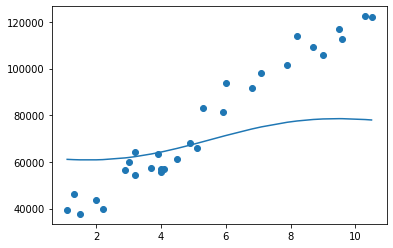

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_svr.predict(X))

In [ ]:
                                                                                      """              SVM LATIHAN             """"

In [ ]:
import pandas as pd

In [ ]:
from sklearn import datasets

In [ ]:
from sklearn.svm import SVC

In [ ]:
import seaborn as sb

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
iris = datasets.load_iris()

In [ ]:
index = ['sepal_panjang', 'sepal_lebar', 'petal_panjang', 'petal_lebar']

In [ ]:
attribute = iris.data

In [ ]:
data =  pd.DataFrame(attribute, columns= index)

In [ ]:
data["species"] = iris.target

In [ ]:
data['species'].replace([0,1,2], ['iris sentosa', 'iris versicolor', 'iris virginica'],inplace=True)


In [ ]:
data = data.drop(data[data['species'] == 'iris virginica'].index)
data.head(111)

,sepal_panjang,sepal_lebar,petal_panjang,petal_lebar,species
0,5.1,3.5,1.4,0.2,iris sentosa
1,4.9,3.0,1.4,0.2,iris sentosa
2,4.7,3.2,1.3,0.2,iris sentosa
3,4.6,3.1,1.5,0.2,iris sentosa
4,5.0,3.6,1.4,0.2,iris sentosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,iris versicolor
96,5.7,2.9,4.2,1.3,iris versicolor
97,6.2,2.9,4.3,1.3,iris versicolor
98,5.1,2.5,3.0,1.1,iris versicolor


In [ ]:
set(data['species'])

{'iris sentosa', 'iris versicolor'}

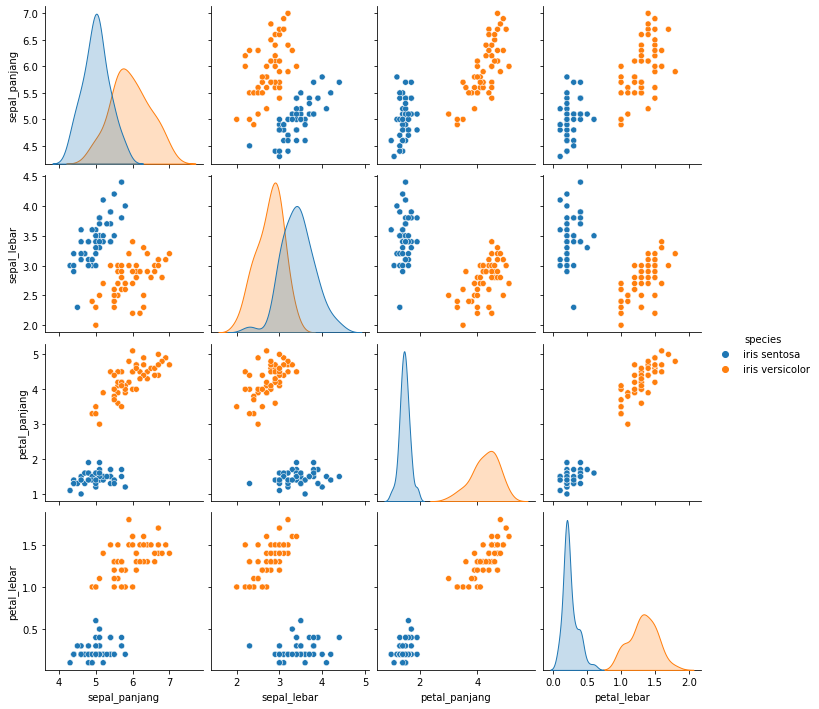

In [ ]:
sb.pairplot(data, hue='species')

In [ ]:
#dari gambar di atas cari yang linier berdekatan 

In [ ]:
X = data[['petal_lebar', 'petal_panjang']]

In [ ]:
y = data['species']

In [ ]:
svc_model = SVC(kernel='linear')
svc_model.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
color = {'iris sentosa': 'b', 'iris versicolor': 'g'}

In [ ]:
                                                                                                  """       hyperplane plot       """

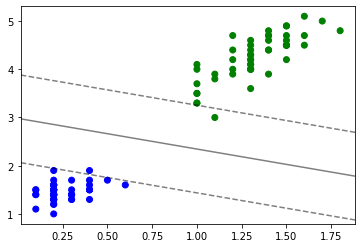

In [ ]:
plt.scatter(X['petal_lebar'], X['petal_panjang'], c=[color[r] for r in y])
ax = plt.gca() #mengambil current axes
xlim = ax.get_xlim() #mengambil nilai max range
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30) #ambil 40 titik
yy = np.linspace(ylim[0], ylim[1], 30) #ambil 40 titik
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])